# Word Cloud from Pride and Prejudice based on word frequency

In [1]:
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

## Data Collection

In [2]:
try:
    with open('pride_prejudice.txt') as ppbook:
        lines = ppbook.readlines()
        print(len(lines))
except FileNotFoundError:
    print('File not found.')
            

14061


In [3]:
lines[0:10]

['      Chapter 1\n',
 '\n',
 '      It is a truth universally acknowledged, that a single man in\n',
 '      possession of a good fortune, must be in want of a wife.\n',
 '\n',
 '      However little known the feelings or views of such a man may be\n',
 '      on his first entering a neighbourhood, this truth is so well\n',
 '      fixed in the minds of the surrounding families, that he is\n',
 '      considered the rightful property of some one or other of their\n',
 '      daughters.\n']

## Data Preparation

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# remove the stopwords

stop_words = set(stopwords.words('english'))
stop_words.update(['mr', 'ms', 'mrs'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krustybr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def clean_line(line: str) -> str:
    # remove trailing and leading spaces
    # remove punctuation
    line = re.sub(r'[\n,;`:."“”‘’„”«»><{}\[\]|+=_()*&%$#@!~\'?]', '', line.strip().lower())
    # remove special hyphens
    line = line.replace('—', ' ')
    # remove stop_words
    line = list(filter(lambda x: x not in stop_words, line.split()))
    return ' '.join(line)

In [6]:
clean_lines = list(map(clean_line, lines))

In [7]:
clean_lines[0:15]

['chapter 1',
 '',
 'truth universally acknowledged single man',
 'possession good fortune must want wife',
 '',
 'however little known feelings views man may',
 'first entering neighbourhood truth well',
 'fixed minds surrounding families',
 'considered rightful property one',
 'daughters',
 '',
 'dear bennet said lady one day',
 'heard netherfield park let last',
 '',
 'bennet replied']

In [8]:
# remove empty lines
clean_lines0 = [line for line in clean_lines if not line == '']

In [9]:
# Tokenize each sentence into words
words_list = list(map(lambda x: x.split(), clean_lines0))

In [10]:
# flattening the words_list
# concatenate all lists of words
wlist_flat = [word for words in words_list for word in words]

In [11]:
wlist_flat[0:15]

['chapter',
 '1',
 'truth',
 'universally',
 'acknowledged',
 'single',
 'man',
 'possession',
 'good',
 'fortune',
 'must',
 'want',
 'wife',
 'however',
 'little']

## Data Statistics

In [12]:
# count word frequency
word_freq = Counter(wlist_flat)

In [13]:
# get 200 most frequent words
word_freq_sort = {}

words = sorted(word_freq, key=word_freq.get, reverse=True)

for word in words[0:200]:
    word_freq_sort[word] = word_freq[word]

In [14]:
word_freq_sort

{'elizabeth': 597,
 'could': 526,
 'would': 471,
 'said': 401,
 'darcy': 374,
 'much': 328,
 'must': 308,
 'bennet': 294,
 'miss': 283,
 'one': 267,
 'jane': 263,
 'bingley': 257,
 'know': 238,
 'though': 226,
 'never': 220,
 'soon': 216,
 'well': 214,
 'think': 211,
 'time': 200,
 'might': 200,
 'every': 197,
 'may': 193,
 'little': 189,
 'good': 184,
 'lady': 183,
 'sister': 178,
 'nothing': 177,
 'without': 170,
 'make': 167,
 'shall': 162,
 'wickham': 162,
 'say': 160,
 'dear': 158,
 'collins': 156,
 'family': 152,
 'see': 149,
 'man': 145,
 'first': 145,
 'great': 141,
 'two': 135,
 'however': 134,
 'lydia': 133,
 'day': 130,
 'young': 130,
 'ever': 130,
 'made': 126,
 'give': 123,
 'us': 123,
 'hope': 121,
 'many': 120,
 'last': 119,
 'always': 119,
 'away': 117,
 'father': 116,
 'letter': 115,
 'long': 114,
 'sisters': 114,
 'cannot': 112,
 'room': 112,
 'thought': 112,
 'mother': 110,
 'catherine': 110,
 'way': 108,
 'enough': 106,
 'house': 106,
 'go': 104,
 'friend': 104,
 'r

## Data Visualisation

In [15]:
# create the wordcloud object
wordcloud = WordCloud(colormap='cividis', background_color='white', width=800, height=400)

In [16]:
wordcloud = wordcloud.fit_words(word_freq_sort)

In [17]:
wordcloud = wordcloud.to_file('PrideAndPrejudice.png')

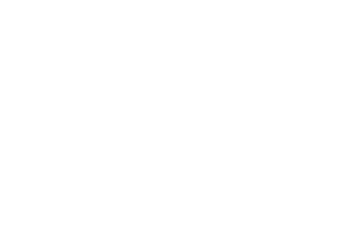

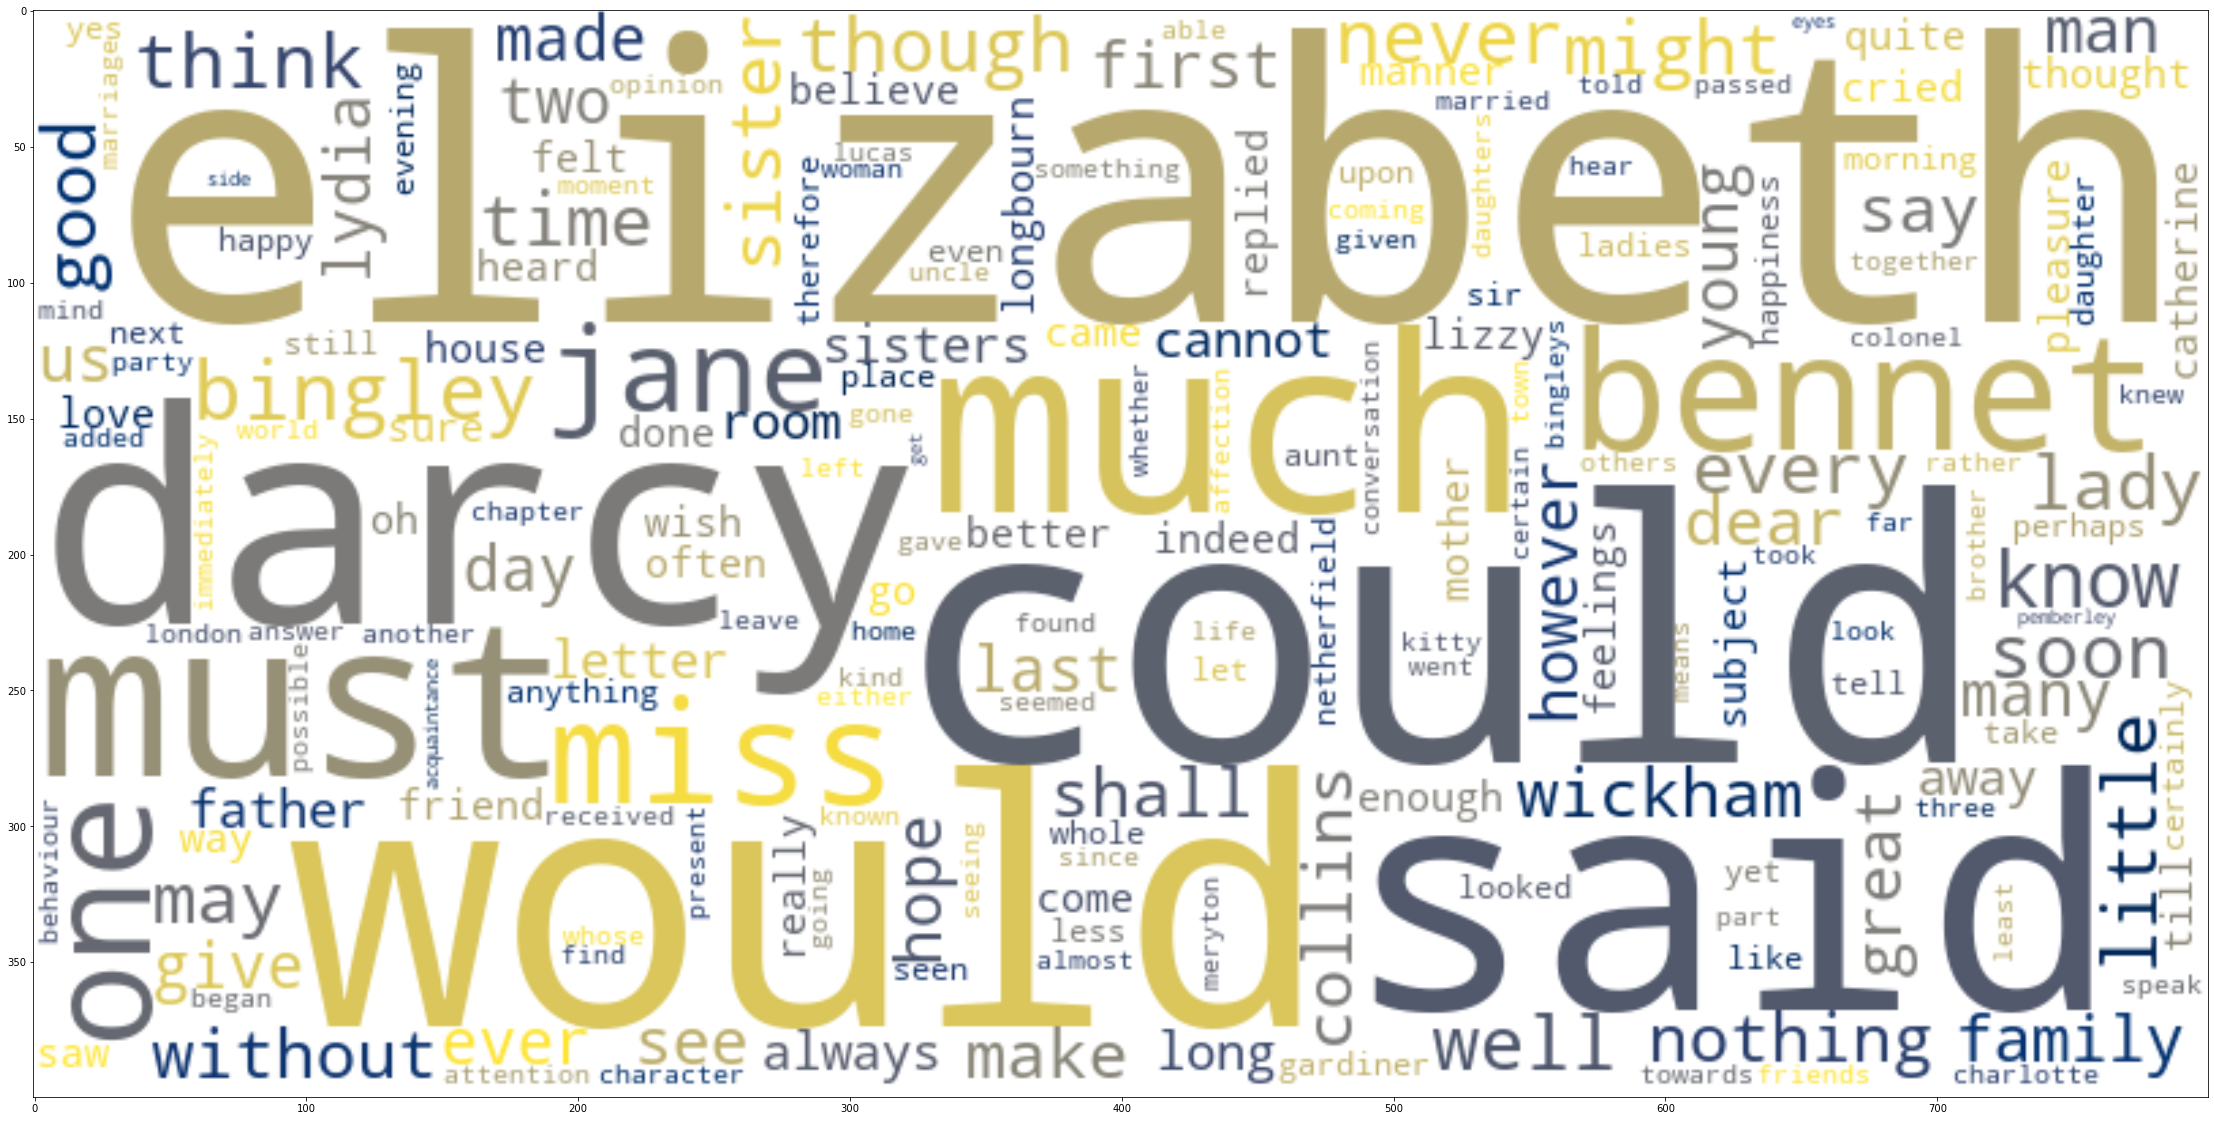

In [18]:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')